# Project 1: Digit Classification with KNN and Naive Bayes

In this project, you'll implement your own image recognition system for classifying digits. Read through the code and the instructions carefully and add your own code where indicated. Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but <b> please prepare your own write-up (with your own code). </b>

If you're interested, check out these links related to digit recognition:

Yann Lecun's MNIST benchmarks: http://yann.lecun.com/exdb/mnist/

Stanford Streetview research and data: http://ufldl.stanford.edu/housenumbers/

In [1]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_mldata
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report


# Set the randomizer seed so results are the same each time.
np.random.seed(0)

/home/sleeper/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/sleeper/anaconda2/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


Load the data. Notice that we are splitting the data into training, development, and test. We also have a small subset of the training data called mini_train_data and mini_train_labels that you should use in all the experiments below, unless otherwise noted.

In [84]:
# Load the digit data either from mldata.org, or once downloaded to data_home, from disk. The data is about 53MB so this cell
# should take a while the first time your run it.
mnist = fetch_mldata('MNIST original', data_home='~/datasets/mnist')
X, Y = mnist.data, mnist.target

# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

print 'data shape: ', X.shape
print 'label shape:', Y.shape

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]

data shape:  (70000, 784)
label shape: (70000,)


(1) Create a 10x10 grid to visualize 10 examples of each digit. Python hints:

- plt.rc() for setting the colormap, for example to black and white
- plt.subplot() for creating subplots
- plt.imshow() for rendering a matrix
- np.array.reshape() for reshaping a 1D feature vector into a 2D matrix (for rendering)

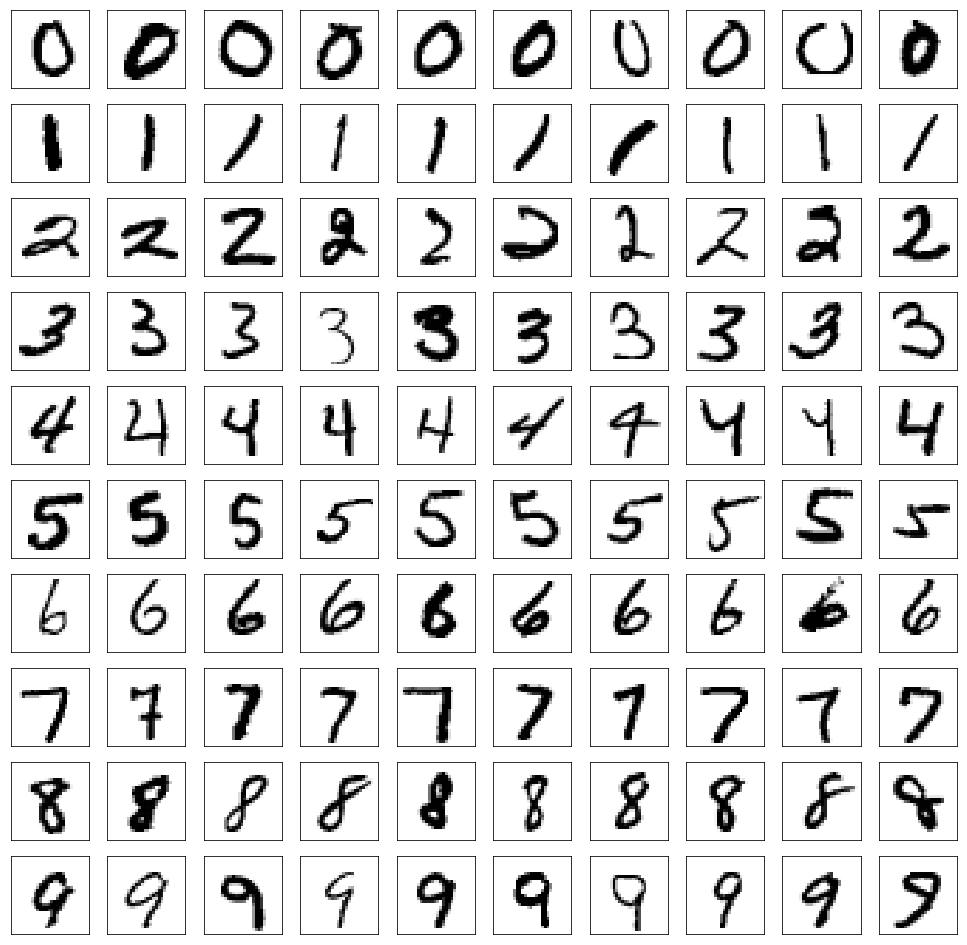

In [199]:
#Setting colormap

plt.rc('image',cmap='gray_r')

def P1(num_examples):

### STUDENT START ###
    
    num_index=[]
    # Creating subplots and fixing size to 17 ,17
    f,arr_index = plt.subplots(10,num_examples,figsize=(17,17))
    for i in (range(10)):
        ## looking for the index for numbers 0-9 in the mini_train_lables using the np.where function
        num_index=np.where(mini_train_labels == i)  
        
        ##ploting the digits
        for j in range(num_examples):
            arr_index[i,j].imshow(mini_train_data[num_index[0][j]].reshape(28,28))
            arr_index[i,j].set_yticks([])
            arr_index[i,j].set_xticks([])
            
            
### STUDENT END ###

P1(10)

(2) Evaluate a K-Nearest-Neighbors model with k = [1,3,5,7,9] using the mini training set. Report accuracy on the dev set. For k=1, show precision, recall, and F1 for each label. Which is the most difficult digit?

- KNeighborsClassifier() for fitting and predicting
- classification_report() for producing precision, recall, F1 results

In [200]:

## A function for easy accuracy calculation
def accuracy_score(y_predict,y_true):
    correct, total,accuracy = 0, 0, 0
    for pred, label in zip(y_predict, y_true):
        if pred == label: correct += 1
        total += 1
    accuracy = 1.0*correct/total
    return accuracy, correct, total
    
def P2(k_values):
    
    for k in k_values:
        ## Fitting a K-nearest neighbor model
        knn = KNeighborsClassifier(k,'uniform')
        y_pred = knn.fit(mini_train_data,mini_train_labels).predict(dev_data)
        
        #Calculating the accuray 
        accuracy, correct, total = accuracy_score(y_pred,dev_labels)
        
        if k == 1:  ## if k == 1 print the classification report
            print "Classification Report for K=1"
            print classification_report(dev_labels,y_pred)
        print 'Total: %3d  correct: %3d  accuracy: %3.2f for k = %d'  %(total, correct, accuracy , k)

k_values = [1, 3, 5, 7, 9]
P2(k_values)

print "From the Classification Report we can see that 8 is the most difficult digit."

Classification Report for K=1
             precision    recall  f1-score   support

        0.0       0.92      0.96      0.94        95
        1.0       0.87      0.99      0.93       117
        2.0       0.93      0.90      0.91        86
        3.0       0.88      0.90      0.89       109
        4.0       0.91      0.81      0.86        89
        5.0       0.83      0.82      0.83        78
        6.0       0.95      0.97      0.96        89
        7.0       0.88      0.93      0.90       109
        8.0       0.92      0.71      0.80       121
        9.0       0.81      0.89      0.84       107

avg / total       0.89      0.89      0.88      1000

Total: 1000  correct: 886  accuracy: 0.89 for k = 1
Total: 1000  correct: 870  accuracy: 0.87 for k = 3
Total: 1000  correct: 867  accuracy: 0.87 for k = 5
Total: 1000  correct: 863  accuracy: 0.86 for k = 7
Total: 1000  correct: 858  accuracy: 0.86 for k = 9
From the Classification Report we can see that 8 is the most difficult 

ANSWER:

(3) Using k=1, report dev set accuracy for the training set sizes below. Also, measure the amount of time needed for prediction with each training size.

- time.time() gives a wall clock value you can use for timing operations

In [86]:
def P3(train_sizes, accuracies):

### STUDENT START ###
    pred_time_arr=[]
    for k in range(len(train_sizes)):
        
        ## Fitting the kNN model with k=1
        knn = KNeighborsClassifier(1,'uniform')
        clf = knn.fit(train_data[:train_sizes[k]],train_labels[:train_sizes[k]])
        
        #Setting the timer
        start_time = time.time()
        y_pred = clf.predict(dev_data)
        
        #getting the time difference
        pred_time=time.time()-start_time
        pred_time_arr.append(pred_time)

        # getting the accuracy, correct predictions and totatl data points
        accuracy, correct, total = accuracy_score(y_pred,dev_labels)
        accuracies.append(accuracy)
        print 'The accuracy for training size of %3d is %3.2f and time is %3.2f ' %(train_sizes[k],accuracy,pred_time) 
    return np.array(accuracies),np.array(pred_time_arr)
### STUDENT END ###

train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25000]
accuracies = []
pred_time=[]
accuracies,pred_time = P3(train_sizes, accuracies)


The accuracy for training size of 100 is 0.75 and time is 0.19 
The accuracy for training size of 200 is 0.80 and time is 0.37 
The accuracy for training size of 400 is 0.84 and time is 0.70 
The accuracy for training size of 800 is 0.88 and time is 1.43 
The accuracy for training size of 1600 is 0.90 and time is 2.82 
The accuracy for training size of 3200 is 0.92 and time is 5.78 
The accuracy for training size of 6400 is 0.93 and time is 11.28 
The accuracy for training size of 12800 is 0.95 and time is 23.22 
The accuracy for training size of 25000 is 0.96 and time is 45.09 


(4) Fit a regression model that predicts accuracy from training size. What does it predict for n=60000? What's wrong with using regression here? Can you apply a transformation that makes the predictions more reasonable?

- Remember that the sklearn fit() functions take an input matrix X and output vector Y. So each input example in X is a vector, even if it contains only a single value.

/home/sleeper/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/home/sleeper/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


Accuracy  for n=60000 is 1.2 using no transformation
Accuracy  for n=60000 is 1.0 using tanh transformation


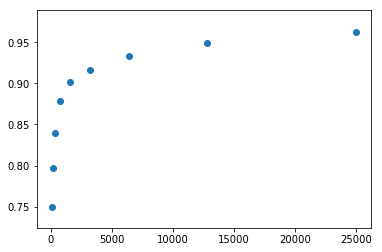

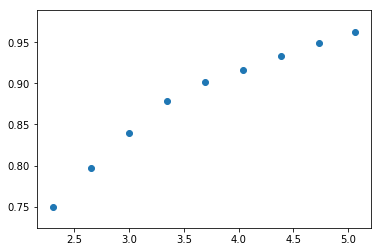

In [198]:
train_sizes_np = np.array(train_sizes).reshape(9,1)
def P4():

### STUDENT START ###
    lm = LinearRegression()
    lm_fit = lm.fit(train_sizes_np,accuracies)
    
    lm_pred_acc = lm_fit.predict([60000])
    

    print "Accuracy  for n=60000 is %3.1f using no transformation"%(lm_pred_acc)
    
    lm_fit = lm.fit(np.log(np.sqrt(train_sizes_np)),accuracies)

    lm_pred_acc = lm_fit.predict(np.log(np.sqrt([60000])))
    
    print ""
    print "Accuracy  for n=60000 is %3.1f using tanh transformation"%(lm_pred_acc)
### STUDENT END ###

P4()
## We can see that the the predicted accuracy is higer that 1 which is not possible
## We can use the from the first figure we can see that the training size has almost a logarithmic curve
## When we plot the log of the square root of training size vs the accuracy we see a much better line.

plt.figure(1)
#plt.subplot(211)
plt.scatter(train_sizes,accuracies)
#plt.subplot(212)

plt.figure(2)
plt.scatter(np.log(np.sqrt(train_sizes)),(accuracies))
#plt.xlim(1,1.000025)
plt.show()


ANSWER: We can see that the the predicted accuracy is higer that 1 which is not possible. We can use the from the first figure we can see that the training size is the logarithmic of accurary. When we plot the log of training size vs the accuracy we see a much better line.

Fit a 1-NN and output a confusion matrix for the dev data. Use the confusion matrix to identify the most confused pair of digits, and display a few example mistakes.

- confusion_matrix() produces a confusion matrix

[[ 91   0   4   0   0   1   2   0   0   1]
 [  1 116   0   2   2   3   0   6   3   0]
 [  0   1  77   0   0   0   0   1   4   0]
 [  0   0   0  98   0   1   0   0  12   1]
 [  0   0   0   0  72   0   0   0   1   6]
 [  1   0   0   4   0  64   1   0   7   0]
 [  1   0   0   0   0   3  86   0   1   0]
 [  0   0   4   1   2   1   0 101   2   4]
 [  0   0   1   3   0   3   0   0  86   0]
 [  1   0   0   1  13   2   0   1   5  95]]

 From confusion matrix it looks like that the most mistaken numbers are 4 and 9  as well as 8 and 3 

The predicted value is 7 and the true value is 3
The predicted value is 4 and the true value is 9
The predicted value is 9 and the true value is 4
The predicted value is 8 and the true value is 3


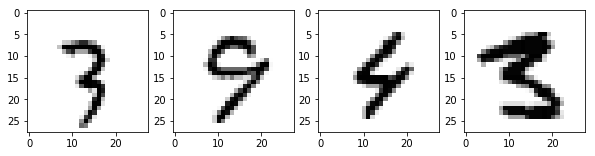

In [201]:
def P5():

### STUDENT START ##
    
    ## Building the K nearest neighbor with K = 1
    knn = KNeighborsClassifier(1,'uniform')
    y_pred = knn.fit(mini_train_data,mini_train_labels).predict(dev_data)
    ## printing the confusion matrix
    print confusion_matrix(y_pred,dev_labels)
    
    print ""
    
    print " From confusion matrix it looks like that the most mistaken numbers are 4 and 9  as well as 8 and 3 "
    
    print ""
    
    ### print numbers which are errors
    j=0
    plt.figure(figsize=(10,5))
    for i in range(len(dev_labels)):  # break after for examples 
        if j >=4:
            break
        if y_pred[i] != dev_labels[i] and dev_labels[i] in [4,9,8,3] :  # compare if true value is same as predicted values 
            print "The predicted value is %d and the true value is %d" %(y_pred[i], dev_labels[i])

            plt.subplot(1,4,j+1)
            plt.imshow(dev_data[i].reshape(28,28))
            j=j+1 

### STUDENT END ###

P5()

(6) A common image processing technique is to smooth an image by blurring. The idea is that the value of a particular pixel is estimated as the weighted combination of the original value and the values around it. Typically, the blurring is Gaussian -- that is, the weight of a pixel's influence is determined by a Gaussian function over the distance to the relevant pixel.

Implement a simplified Gaussian blur by just using the 8 neighboring pixels: the smoothed value of a pixel is a weighted combination of the original value and the 8 neighboring values. Try applying your blur filter in 3 ways:
- preprocess the training data but not the dev data
- preprocess the dev data but not the training data
- preprocess both training and dev data


Note that there are Guassian blur filters available, for example in scipy.ndimage.filters. You're welcome to experiment with those, but you are likely to get the best results with the simplified version I described above.

Preprocess the training data but not the dev data
Total: 1000  correct: 902  accuracy: 0.90 for k = 1 for preprocessed train data

Preprocess dev data but not the training data
Total: 1000  correct: 890  accuracy: 0.89 for k = 1 for preprocessed dev data 

Preprocess both training and dev data
Total: 1000  correct: 907  accuracy: 0.91 for k = 1 for preprocessed dev data  and training data

sample images with one without gaussain blur and one with gaussain blur


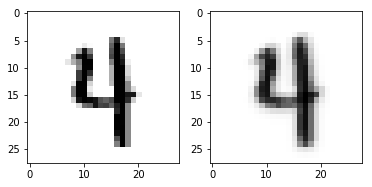

In [202]:
def gaussian_blur(mini_train_data):
    
    data_blur = np.zeros((mini_train_data.shape))
    
    for i in range(len(mini_train_data)):
        
        mini_tr_da_re = np.zeros((28,28))
        mini_tr_da_re = np.copy(mini_train_data[i].reshape(28,28))
        # Here we are performing gaussain blur by averaging of all Neighbors and averaging the result with
        # the value of the pixel itself
        for row in range(len(mini_tr_da_re)-1):
            for col in range(len(mini_tr_da_re[0])-1):
            ## Since the borders are always white we are ignoring the borders
                if row == 0 or col ==0:
                    continue;
                ## performing the gaussian blur
                mini_tr_da_re[row , col] = ((mini_tr_da_re[row-1 ,col-1] + mini_tr_da_re[row-1, col] + mini_tr_da_re[row-1,col+1] \
                                           + mini_tr_da_re[row,col-1] + mini_tr_da_re[row,col+1] + \
                                           mini_tr_da_re[row+1,col-1] + mini_tr_da_re[row + 1,col] + mini_tr_da_re[row+1,col-1])/8 \
                                             + mini_tr_da_re[row,col])/2


        data_blur[i] = mini_tr_da_re.reshape(784)
    return data_blur




def P6():
    
### STUDENT START ###
    #preprocess the training data but not the dev data
    print "Preprocess the training data but not the dev data"
    blurred_train = gaussian_blur(mini_train_data)
    knn = KNeighborsClassifier(1,'uniform')
    
    ##
    y_pred = knn.fit(blurred_train,mini_train_labels).predict(dev_data)
    accuracy, correct, total = accuracy_score(y_pred,dev_labels)
    print 'Total: %3d  correct: %3d  accuracy: %3.2f for k = 1 for preprocessed train data'  %(total, correct, accuracy)
    
    print ""
    #preprocess the dev data but not the training data
    print "Preprocess dev data but not the training data"
    blurred_dev = gaussian_blur(dev_data)

    y_pred = knn.fit(mini_train_data,mini_train_labels).predict(blurred_dev)
    accuracy, correct, total = accuracy_score(y_pred,dev_labels)
    print 'Total: %3d  correct: %3d  accuracy: %3.2f for k = 1 for preprocessed dev data '  %(total, correct, accuracy)
        
    print ""
    #preprocess both training and dev data
    print "Preprocess both training and dev data"
 
    ##
    y_pred = knn.fit(blurred_train,mini_train_labels).predict(blurred_dev)
    accuracy, correct, total = accuracy_score(y_pred,dev_labels)
    print 'Total: %3d  correct: %3d  accuracy: %3.2f for k = 1 for preprocessed dev data  and training data'  %(total, correct, accuracy)
    
    
    print ""
    print "sample images with one without gaussain blur and one with gaussain blur"
    plt.subplot(1,2,1)
    plt.imshow(mini_train_data[75].reshape(28,28))
    plt.subplot(1,2,2)    
    plt.imshow(blurred_train[75].reshape(28,28))

  

    ### STUDENT END ###

P6()

## ANSWER:

(7) Fit a Naive Bayes classifier and report accuracy on the dev data. Remember that Naive Bayes estimates P(feature|label). While sklearn can handle real-valued features, let's start by mapping the pixel values to either 0 or 1. You can do this as a preprocessing step, or with the binarize argument. With binary-valued features, you can use BernoulliNB. Next try mapping the pixel values to 0, 1, or 2, representing white, grey, or black. This mapping requires MultinomialNB. Does the multi-class version improve the results? Why or why not?

In [206]:
 ## function to map biniary values i.e if values <= 0.5 then 0 else 1

g = lambda x: 0  if x<=0.5  else  1 

## vectorizing function so that it can be applied over a numpy array
biniary_mapper = np.vectorize(g)


def P7():

### STUDENT START ###
    print ""
    print "Modeling for Bernoulli Naive bayes classifier"
    

    ## mapping the training data to biniary
    biniary_train_data = biniary_mapper(mini_train_data)
    
    ## bulding biniary Naive Bayes model using BernoulliNB 
    nb = BernoulliNB()
    nb.fit(biniary_train_data, mini_train_labels)

    ## calculating the score
    print " The accuray score using BernoulliNB is %3.4f" %nb.score(biniary_mapper(dev_data),dev_labels)
    
    
    print ""
    print "Modeling for Multinomial Naive bayes classifier"
    
    ## function to map biniary values i.e if values x <= 0.33 then 0,  0.33<x <=0.66 then 1  else 2
        
    f = lambda x: 0  if x<=0.33  else( 1 if x <=.66 else 2) 

    ## vectorizing function so that it can be applied over a numpy array
    multinom_mapper = np.vectorize(f)
    
    ## mapping the training data to biniary
    multinom_data = multinom_mapper(mini_train_data)

    ## building MultinomialNB Naive Bayes model
    
    mnb = MultinomialNB()
    mnb.fit(multinom_data, mini_train_labels)
    
    ## calculating score
    print " The accuray score using MultinomialNB is %3.4f " %nb.score(multinom_mapper(dev_data),dev_labels)
    


    
    ### STUDENT END ###

P7()

print ""

print "We see that the multinomial NB and Bernoulli performs performs almost very similar."
print "This is because the 'grey' pixel do not add much information when trying to predict the numbers "


Modeling for Bernoulli Naive bayes classifier
 The accuray score using BernoulliNB is 0.8240

Modeling for Multinomial Naive bayes classifier
 The accuray score using MultinomialNB is 0.8320 

We see that the multinomial NB and Bernoulli performs performs almost very similar.
This is because the 'grey' pixel do not add much information when trying to predict the numbers 


ANSWER:We see that the multinomial NB and Bernoulli performs performs almost very similar.This is because the 'grey' pixel do not add much information when trying to predict the numbers

(8) Use GridSearchCV to perform a search over values of alpha (the Laplace smoothing parameter) in a Bernoulli NB model. What is the best value for alpha? What is the accuracy when alpha=0? Is this what you'd expect?

- Note that GridSearchCV partitions the training data so the results will be a bit different than if you used the dev data for evaluation.

In [213]:
def P8(alphas):

### STUDENT START ###

    ## bulding biniary Naive Bayes model using BernoulliNB 
    nb = BernoulliNB()
    
    ## Passing the BernoulliNB model to the grid serach along with the alphas
    clf = GridSearchCV(nb,alphas)
    clf.fit(biniary_mapper(mini_train_data), mini_train_labels)
    return clf


### STUDENT END ###

alphas = {'alpha': [0.0, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
nb = P8(alphas)


print "The best alpa is %3.4f" %(nb.best_params_['alpha'])
print "The best score for alpha 0.01 is %3.4f" %(nb.best_score_)

print ''
print "Let is look at the grid scores"
print ''
print nb.grid_scores_
print ''
print "For Alpha:0 all the weight is given to the prior. Here the prior is 1/10 . Hence the accuracy we see in grid score for zero is as expected. "

The best alpa is 0.0100
The best score for alpha 0.01 is 0.8250

Let is look at the grid scores

[mean: 0.10500, std: 0.00079, params: {'alpha': 0.0}, mean: 0.82000, std: 0.01754, params: {'alpha': 0.0001}, mean: 0.82300, std: 0.01342, params: {'alpha': 0.001}, mean: 0.82500, std: 0.01207, params: {'alpha': 0.01}, mean: 0.82200, std: 0.01206, params: {'alpha': 0.1}, mean: 0.81600, std: 0.01345, params: {'alpha': 0.5}, mean: 0.81200, std: 0.02280, params: {'alpha': 1.0}, mean: 0.80300, std: 0.02354, params: {'alpha': 2.0}, mean: 0.71400, std: 0.01521, params: {'alpha': 10.0}]

For Alpha:0 all the weight is given to the prior. Here the prior is 1/10 . Hence the accuracy we see in grid score for zero is as expected. 


(9) Try training a model using GuassianNB, which is intended for real-valued features, and evaluate on the dev data. You'll notice that it doesn't work so well. Try to diagnose the problem. You should be able to find a simple fix that returns the accuracy to around the same rate as BernoulliNB. Explain your solution.

Hint: examine the parameters estimated by the fit() method, theta\_ and sigma\_.

The accuracy for Gaussian Naive bayes 0.63

The accuracy for Gaussian Naive bayes with sigma of 0.01 is 0.80


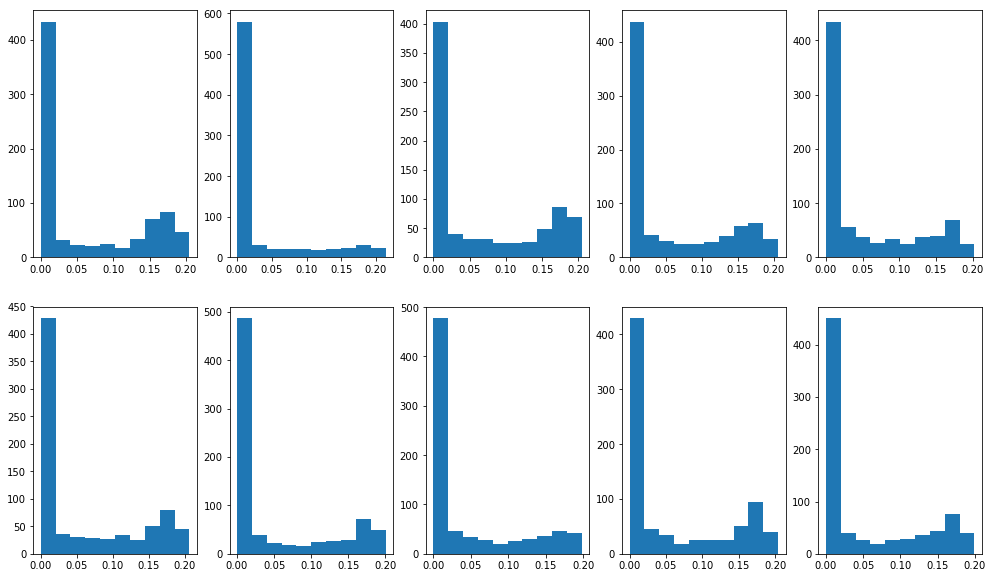

In [153]:
def P9():

### STUDENT END ###

## Fitting gausaain model 
    gnb = GaussianNB()
    y_pred = gnb.fit(mini_train_data,mini_train_labels).predict(dev_data)
    
## Predicting the values   
    correct = y_pred==dev_labels
    print "The accuracy for Gaussian Naive bayes %3.2f" %np.mean(correct)

## Predicting the values   
    gnb = GaussianNB()
    nb = gnb.fit(mini_train_data,mini_train_labels)
    
    ## Let us examoine the nb.simga values for the 10 numbers
    ## we can see that the sigma for most of the pixels is extermely less.
    ## That means that most of the pixels hardly see any changes and so their SD is very less
    plt.figure(figsize=(17,10))
    for i in range(10):
        plt.subplot(2,5,i+1)
        plt.hist(nb.sigma_[i])
        
    
    ## We can apply a 
    nb.sigma_[...] = .01
    y_pred = nb.predict(dev_data)
    correct = y_pred==dev_labels
    
    print ""
    print "The accuracy for Gaussian Naive bayes with sigma of 0.01 is %3.2f" %np.mean(correct)

### STUDENT END ###

gnb = P9()

ANSWER:

(10) Because Naive Bayes is a generative model, we can use the trained model to generate digits. Train a BernoulliNB model and then generate a 10x20 grid with 20 examples of each digit. Because you're using a Bernoulli model, each pixel output will be either 0 or 1. How do the generated digits compare to the training digits?

- You can use np.random.rand() to generate random numbers from a uniform distribution
- The estimated probability of each pixel is stored in feature\_log\_prob\_. You'll need to use np.exp() to convert a log probability back to a probability.

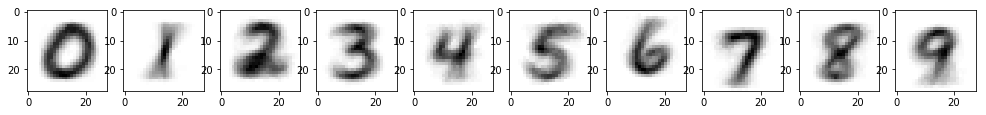

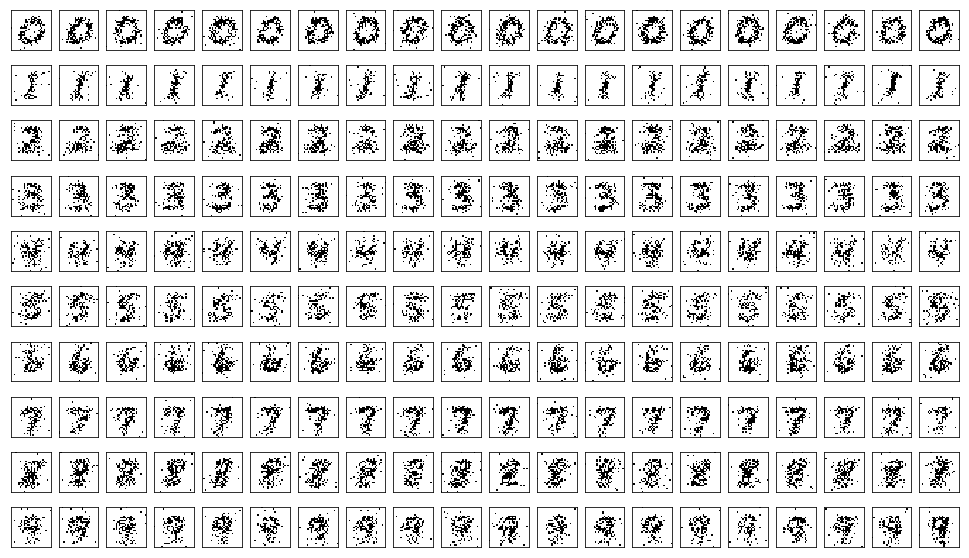

In [167]:



def P10(num_examples):

    ### STUDENT START ###
    biniary_train_data = biniary_mapper(mini_train_data)
    
    ## bulding biniary Naive Bayes model using BernoulliNB 
    nb = BernoulliNB()
    clf = nb.fit(biniary_train_data, mini_train_labels)
    
    ## we store the probability estimates in proba
    ## Since feature_log_prob return log probability we have to convert it back to probability
    proba = np.exp(nb.feature_log_prob_)
    
    
     ## We can see the training probabilites as well
    plt.figure(figsize=(17,5))
    for i in range(10):
        
        plt.subplot(1,10,i+1)
        plt.imshow(proba[i].reshape(28,28))
    
    plt.figure(2)
    plt.figure(figsize=(17,10))
    
    
    ## Plotting the numbers 
    f,arr_index = plt.subplots(10,20,figsize=(17,10))
    for i in (range(10)):
        for j in range(20):
            
            ## We take an array random numbers 
            rand_num = np.random.rand(1,784)
            
            ## we compare it with our feature probability 
            generated_ml = rand_num <= proba[i]
            
            ## We plot the 10 X 20 matrix
            arr_index[i,j].imshow(generated_ml.reshape(28,28))
            arr_index[i,j].set_yticks([])
            arr_index[i,j].set_xticks([])
        
    ### STUDENT END ###


P10(20)

ANSWER: From the images we can see that the generated images are somewhat similar to the the training images

(11) Remember that a strongly calibrated classifier is rougly 90% accurate when the posterior probability of the predicted class is 0.9. A weakly calibrated classifier is more accurate when the posterior is 90% than when it is 80%. A poorly calibrated classifier has no positive correlation between posterior and accuracy.

Train a BernoulliNB model with a reasonable alpha value. For each posterior bucket (think of a bin in a histogram), you want to estimate the classifier's accuracy. So for each prediction, find the bucket the maximum posterior belongs to and update the "correct" and "total" counters.

How would you characterize the calibration for the Naive Bayes model?

In [163]:
def P11(buckets, correct, total):
    
### STUDENT START ###
    ## converting the training data into biniary form
    biniary_train_data = biniary_mapper(mini_train_data)
    
    ## bulding biniary Naive Bayes model using BernoulliNB 
    nb = BernoulliNB(alpha = 0.01)
    clf = nb.fit(biniary_train_data, mini_train_labels)
    
    ## getting the probability of each class for dev_data
    predNB = clf.predict_proba(dev_data)


    
    ## Now looking for the maximum posterior in each bucket
    for index in range(len(buckets)):
        for i in range(len(predNB)):
            
            ## Looking for the maximum posterior for dev_data sample index i.
            ## this returns th index number for the maxium posterior which also corresponds to the predicted number
            pred_num = np.argmax(predNB[i])
    
            
            ## Looping though the predicted posterior probabilities and updating correct and total lists.
            if (predNB[i][pred_num] <= buckets[index])  :
        
                total[index] = total[index]+1
                if (pred_num/1.0) == dev_labels[i]:
                    correct[index] = correct[index]+1
             
    ### STUDENT END ###

buckets = [0.5, 0.9, 0.999, 0.99999, 0.9999999, 0.999999999, 0.99999999999, 0.9999999999999, 1.0]
correct = [0 for i in buckets]
total = [0 for i in buckets]

P11(buckets, correct, total)


for i in range(len(buckets)):
    accuracy = 0.0
    if (total[i] > 0): accuracy = (correct[i]*1.0) / (total[i]*1.0)
    print 'p(pred) <= %.13f    total = %3d    accuracy = %.3f' %(buckets[i], total[i], accuracy)
    




p(pred) <= 0.5000000000000    total =   0    accuracy = 0.000
p(pred) <= 0.9000000000000    total =  43    accuracy = 0.488
p(pred) <= 0.9990000000000    total = 110    accuracy = 0.500
p(pred) <= 0.9999900000000    total = 176    accuracy = 0.506
p(pred) <= 0.9999999000000    total = 234    accuracy = 0.526
p(pred) <= 0.9999999990000    total = 283    accuracy = 0.558
p(pred) <= 0.9999999999900    total = 326    accuracy = 0.589
p(pred) <= 0.9999999999999    total = 384    accuracy = 0.617
p(pred) <= 1.0000000000000    total = 1000    accuracy = 0.818


ANSWER:  ##We can see that higher the calibration higher is the accuracy

(12) EXTRA CREDIT

Try designing extra features to see if you can improve the performance of Naive Bayes on the dev set. Here are a few ideas to get you started:
- Try summing the pixel values in each row and each column.
- Try counting the number of enclosed regions; 8 usually has 2 enclosed regions, 9 usually has 1, and 7 usually has 0.

Make sure you comment your code well!

In [18]:
#def P12():

### STUDENT START ###


### STUDENT END ###

#P12()